# 套件 Package
Python 已經有許多人針對某些問題開發不同的套件 (package)，很多時候我們想要解決的問題可能 Google 一下就能找到人家現成的套件來解決問題。

而 Python 本身也內建豐富的[**標準函式庫**](https://docs.python.org/zh-tw/3.9/library/index.html)，可能光使用他們就能解決你的問題了。


# `import`
如果我們要使用這些額外的功能，我們需要指定要使用的套件，不論是第三方的套件或是標準函式庫都需要，因為 import 一個函式庫可能會需要不少時間。

如果我們想要印出當下的時間，標準函式庫裡 time 模組中的 [`strftime`](https://docs.python.org/zh-tw/3.9/library/time.html#time.strftime)，有兩種方式可以 import

---
#### Syntax
1. **引入整個模組**
    ```python
    import time # 引入 time 模組

    time.strftime("%c") # 呼叫 time 模組裡面的 strftime 函式
    ```

2. **引入模組內的函式/變數**
    ```python
    from time import strftime # 從 time 模組引入 strftime

    strftime("%c") # 直接呼叫 strftime
    ```
---

兩種做法都能夠執行函式得到同樣的結果，要使用哪種方式看個人的風格。

我個人在嘗試函式功能的階段通常會直接 import 整個模組，一旦確定是使用那些函式並開發程式的時候會用第二種，讓程式碼比較簡潔。

偶爾，會遇到有不同的模組使用同個函數名稱的情況，如果是 import 整個模組的話就能避免衝突問題。

In [ ]:
import time

time.strftime("%c")

In [ ]:
from time import strftime

strftime("%x")

## 標準函式庫中常用的模組
* 編程工具
    * `itertools`: 高效率的迭代器
    * `functolls`: 包裝已有函式
    * `collections`: 提供更進階的容器
    * `bisect`: 搜尋已排序容器中數值的位置
    * `copy`: 複製容器
* 檔案讀寫
    * `open(file, mode="r")`: 開啟檔案並讀取或寫入 (這個其實是內建函式，我們之前沒有教)
    * `pathlib`: 以物件的方式操控目錄位置或檔案
    * `glob`: 搜尋目錄的檔案內容
    * `json`: 讀取/寫入 json 格式檔案
    * `pickle`: 將物件儲存成檔案並再讀取。(不要讀取來路不明的 pickle 檔案，因為讀取的過程可能會執行程式碼)

除了常用的，也有一些滿足特定需求的模組
* 寄送電子郵件: `smtplib`
* 撰寫電子郵件: `email`
* 圖形使用者介面 GUI: `tkinter`
* 執行其他程式並與 python 溝通: `subprocess`

Python 的文件寫得都滿齊全的，而且也有[程式碼範例](https://docs.python.org/zh-tw/3.9/library/email.examples.html)，下面是參考範例與[學校計算機中心的資訊](https://homepage.ntu.edu.tw/~jsc/ntucc/email/mailsoftwaresetup.html)寫出來的寄 email 程式。


In [5]:
from email.message import EmailMessage
from getpass import getpass # get password
from smtplib import SMTP_SSL


student_id = "B05203027"
# 當然還要密碼，不過不給你們看

msg = EmailMessage()
msg['subject'] = 'Re: 測試信件'
msg['from'] = 'B05203027@ntu.edu.tw' # 兩個郵件地址都可以自己改
msg['to'] = 'B05203027@ntu.edu.tw'


msg.set_content("測試")

# 也可以改成傳送 html，寫出更 fancy 的內容
# msg.set_content(
#     """
#     <html><body>
#     <h1> Title </h1>
#     TEST
#     </body></html>
#     """,
#     subtype='html'
# )

with SMTP_SSL('smtps.ntu.edu.tw') as server: # smtps.ntu.edu.tw 是台大郵件伺服器地址
    server.ehlo()
    server.login(student_id, getpass("請輸入台大計中帳號密碼: "))
    server.send_message(msg)

再示範一個 pathlib 讀取檔案的範例

In [27]:
from pathlib import Path

# 寫入檔案
test_file = Path("test.txt")
test_file.write_text("TEST CONTENTS")

# 讀取檔案
file = Path("test.txt")
print(file.read_text())

TEST CONTENTS


# 第三方函式庫
Python 中也有許多有名的第三方套件，像是之前出現過的 pandas 就是其中之一。

在使用他們之前我們就需要先安裝了，安裝他們最簡單的方法是使用指令 `pip`，通常他們的文件上面都會友叫做 Installation 的部分，告訴你 pip 的指令要怎麼下才會安裝，
通常是 `pip install <package_name>` 的格式。

在 colab 的環境下要安裝可以直接在 `pip` 開頭加上 `!`來執行 pip

In [30]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


# 數值計算相關
## [Numpy](https://numpy.org/numpy-tutorials/)
<img src="https://github.com/numpy/numpy/raw/main/branding/logo/primary/numpylogo.svg" width=300>

numpy 是 python 在進行大量計算時常用的套件，其實許多的套件都使用了它作為基礎，pandas 的底層正使用了 numpy。它提供了 array 物件，但是它是以 C 語言而非 python 撰寫的，因此能達到快速的運算。另外其提供的函式也都是針對 numpy array 進行大量快速的運算的

因為常常大量使用其函式，因此 numpy 官方文件都是 import 整個函式，並為了簡便而取了一個縮寫 `np`

In [34]:
import numpy as np # np 是 numpy 的 縮寫

arr = np.arange(1000000) # 0 - 999999

arr

array([     0,      1,      2, ..., 999997, 999998, 999999])

### 執行速度比較
對於 `arr` 這個 numpy array，使用內建 `sum` 與 `np.sum` 的速度差別相當巨大，np.sum 快上許多。

我個人認為執行速度緩慢的 python 能用來進行科學計算與機器學習很大部分要歸功於 numpy 的貢獻

In [35]:
%%timeit
sum(arr)

76.8 ms ± 546 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
%%timeit
np.sum(arr)

519 µs ± 5.72 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## [Scipy](https://docs.scipy.org/doc/scipy/tutorial/index.html)
<img src="https://docs.scipy.org/doc/scipy/_static/logo.svg" width=75>

Scipy 也是在科學計算上常用的套件。特別如果是念理工學院，又需要數值模擬的時候會非常仰賴它。

## [matplotlib](https://matplotlib.org/stable/tutorials/index.html)
<img src="https://matplotlib.org/stable/_static/images/logo_dark.svg" width=300>

沒圖沒真相，想要觀察計算結果中有甚麼資訊，不透過畫圖是很難明白的。

很多時候這些模組會一起使用，比如我們想看一筆訊號進行 fitting 的結果


In [342]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

def exp(t, a, b, c):
    """
    實部為 cos, 虛部為 sin 函數
    """
    return a * np.exp(b * t) + c

# 格點數量
num_points = 1000

# 添加 noise
rng = np.random.default_rng()
y_noise = 2 * rng.normal(size=num_points)

# 數據，x 軸為時間，y 軸為有 noise 的訊號
x_data = np.linspace(0, 1.5, num_points)
y_data = exp(x_data, 1, 2, 3) + y_noise

a: 0.84 | b: 2.11 | c: 3.23


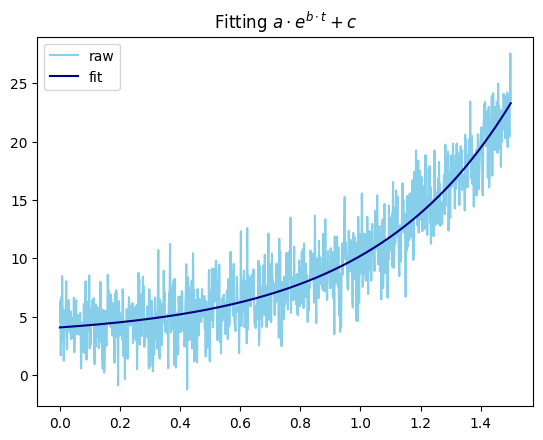

In [343]:
popt, pcov = curve_fit(exp, x_data, y_data)

var_names = ["a", "b", "c"]
print(
    *[f"{var_name}: {popt[i]:.2f}" for i, var_name in enumerate(var_names)],
    sep=" | "
)

plt.plot(x_data, y_data, color="skyblue", label="raw")
plt.plot(x_data, exp(x_data, *popt), color="navy", label="fit")
plt.legend()
plt.title(r"Fitting $a \cdot e^{b \cdot t} + c$")
plt.show()

如果你對這些內容有興趣的話可以參考一下 [scipy lecture](https://lectures.scientific-python.org/)，它會很有系統性地往科學計算的方向來討論。

# 機器學習相關
## [scikit-learn](https://scikit-learn.org/stable/getting_started.html)
![scikit-learn](https://upload.wikimedia.org/wikipedia/commons/0/05/Scikit_learn_logo_small.svg)

scikit-learn 實作了許多經典機器學習模型 (SVM, Random Forest ...)，對於分類與回歸的問題 scikit-learn 往往就足夠解決了。

而如果你想要嘗試音訊、圖像處理，甚至是建立語言模型等更加複雜的應用，就需要**深度學習**的套件了。目前有兩大套件在競爭 PyTorch 和 Keras/Tensorflow (幾年前 Keras 和 tensorflow 合併了)，學術界使用 PyTorch 比較廣泛，業界則是比較偏好 Tensorflow。

# 總結
感謝大家一個月多的參與! 如果你覺得內容很難的話不要灰心，因為我們其實教得很快。
學校的程式課普遍都是 3 學分，我們 6 次的課程相當於只有 2 個禮拜的時數，但是我們的進度已經可以考一次期中考了。
如果你都能掌握之前上課的內容的話那很厲害，給你鼓掌! 如果不行的話也不妨再多回顧幾次，我當初也是學得比同學慢，也許你學程式的速度其實比我還快，別輕易放棄!

我對於這次課程設計的目標其實是讓大家體驗一下用 python 解決一些實際問題的經驗，彌補在傳統程式設計課為了練習語法而相對減少了問題的實用性。
更進階的內容想要留給校內的程式班去教，所以如果你之後也修了程式課也要好好上課練習題哦
